In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
from math import pi

In [8]:
def lorentz(x, y0, amp, cen, wid):
    return y0 + (amp)*(wid/((x-cen)**2 + wid**2))

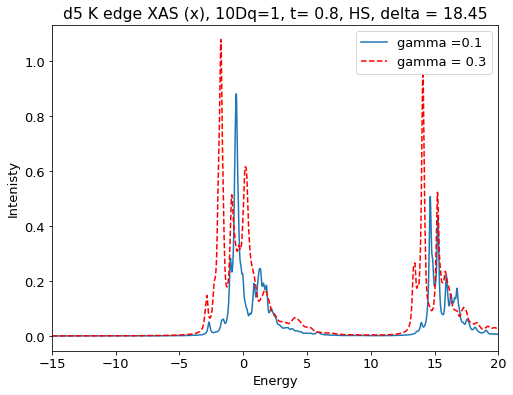

In [143]:
nedos = 10000
shift = 0
xdata = np.linspace(-25,25,nedos)
ydata1 = np.zeros(nedos)
ydata2 = np.zeros(nedos)
inp1 = "./DATA_DIR/nh=4/tenDQ=1.9/del_eff=4.0/t=0.6/XAS_Ledge_X.txt"
inp2 = "./DATA_DIR/nh=5/tenDQ=1.9/del_eff=-4.5/t=0.6/XAS_Ledge_X.txt"
with open(inp1) as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        ydata1 += lorentz(xdata,0,i,p,0.1)
        
with open(inp2) as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        ydata2 += lorentz(xdata,0,i,p,0.1)

plt.figure(figsize=(8,6))
plt.rc('font', size=13)   
plt.plot(xdata+shift,ydata1)
plt.plot(xdata,ydata2,'red',linestyle='--')
plt.legend(['gamma =0.1','gamma = 0.3'])
plt.title("d5 K edge XAS (x), 10Dq=1, t= 0.8, HS, delta = 18.45")
plt.ylabel("Intenisty")
plt.xlabel("Energy")
plt.xlim([-15+shift, 20+shift])

plt.show()

./DATA_DIR/nh=5/tenDQ=1.9/del_eff=-4.5/t=0.4/XAS_Ledge_X.txt
./DATA_DIR/nh=5/tenDQ=1.9/del_eff=-4.5/t=0.6/XAS_Ledge_X.txt
./DATA_DIR/nh=5/tenDQ=1.9/del_eff=-4.5/t=0.8/XAS_Ledge_X.txt


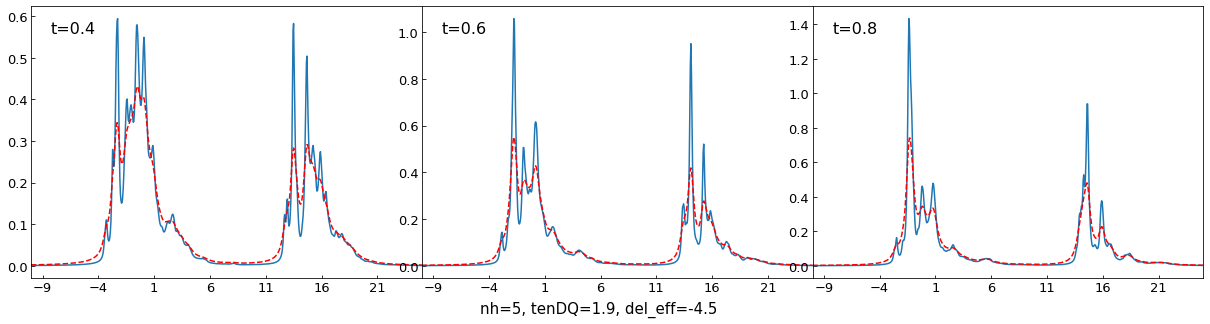

In [129]:
# Plotting d5/d6 LiCoO2
nedos = 1000
nh = 5
tenDQ = 1.9
del_eff = -4.5
edge = 'L'
x = np.linspace(-25,25,nedos)
data_dir = os.path.join("./DATA_DIR","nh="+str(nh),"tenDQ="+f"{tenDQ:.1f}",
                        "del_eff="+f'{del_eff:.1f}')

t_num = len(os.listdir(data_dir))
fig = plt.figure(figsize=(21,5))
gs = fig.add_gridspec(1,t_num,hspace=0,wspace=0)
axs = gs.subplots(sharex=False,sharey=False)
for t,t_dir in enumerate(sorted(os.listdir(data_dir))):
    data_file = os.path.join(data_dir,t_dir,'XAS_'+str(edge)+'edge_X.txt')
    print(data_file)
    xas_01 = np.zeros(nedos)
    xas_03 = np.zeros(nedos)
    with open(data_file) as xas:
        lines = xas.readlines()[1:]
        for l in lines:
            p = float(l.split()[0])
            i = float(l.split()[1])
            xas_01 += lorentz(x,0,i,p,0.1)
            xas_03 += lorentz(x,0,i,p,0.3)
    axs[t].plot(x,xas_01)
    axs[t].plot(x,xas_03,color="red",linestyle="dashed")
    if (edge == 'L'):
        axs[t].set_xlim([-10,25])
        axs[t].set_xticks(range(-9, 26, 5))
    if (edge == 'K'):
        axs[t].set_xlim([-20,0])
        axs[t].set_xticks(range(-18, 0, 5))
    axs[t].annotate(t_dir, xy=(0.05, 0.9), xycoords="axes fraction",fontsize=16)
fig.text(0.5,0.04, "nh="+str(nh)+", tenDQ="+f"{tenDQ:.1f}"+", del_eff="+f'{del_eff:.1f}',ha="center",va="center",fontsize=15)
plt.rc('font', size=13)
for t in range(0,t_num):
    axs[t].tick_params(axis="x",direction="in")
    axs[t].tick_params(axis="y",direction="in")

In [6]:
# Plotting d5/d6 LiCoO2
x = np.linspace(-20,20,nedos)
KE1 = np.zeros(nedos)
LE1= np.zeros(nedos)
KE2 = np.zeros(nedos)
LE2= np.zeros(nedos)
KE3 = np.zeros(nedos)
LE3= np.zeros(nedos)
KE4 = np.zeros(nedos)
LE4= np.zeros(nedos)
# d8HSen = 5.78012
# d8LSen = 4.45975
with open('./M_d9a.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        d9a += lorentz(x,0,i,p,0.1)

with open('./M_d9c.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        d9c += lorentz(x,0,i,0.1)

with open('./M_d8HSa.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        d8HSa += lorentz(x,0,i,p+d8HSen,0.1)

with open('./M_d8HSc.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        d8HSc += lorentz(x,0,i,p+d8HSen,0.1)

with open('./M_d8LSa.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        d8LSa += lorentz(x,0,i,p+d8LSen,0.1)

with open('./M_d8LSc.txt') as xas:
    lines = xas.readlines()[1:]
    for l in lines:
        p = float(l.split()[0])
        i = float(l.split()[1])
        d8LSc += lorentz(x,0,i,p+d8LSen,0.1)

NameError: name 'inp' is not defined

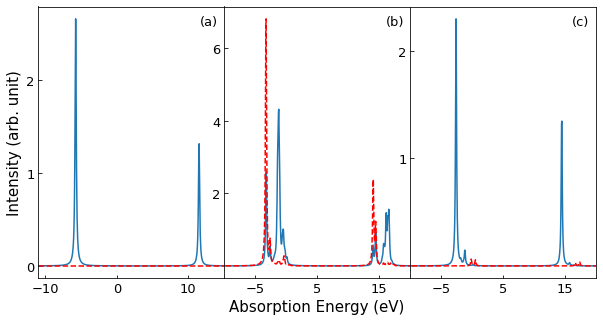

In [389]:
# Plotting linear combination of Nickelate (d9 + d8 S=0 + d8 S=1)
# Parameters Used here: SO -> 11.5 eV

fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(1,3,hspace=0,wspace=0)
axs = gs.subplots(sharex=False,sharey=False)
lw = 1.5
axs[0].plot(x,d9a,linewidth=lw)
axs[0].plot(x,d9c,color="red",linestyle="dashed",linewidth=lw)
axs[0].set_xlim([-11,15])
axs[0].set_xticks(range(-10, 11, 10))
axs[0].set_yticks(range(0, 3, 1))
axs[1].plot(x,d8HSa,linewidth=lw)
axs[1].plot(x,d8HSc,color="red",linestyle="dashed",linewidth=lw)
axs[1].set_xticks(range(-5, 25, 10))
axs[1].set_yticks(range(2, 7, 2))
axs[1].set_xlim([-10,20])
axs[2].plot(x,d8LSa,linewidth=lw)
axs[2].plot(x,d8LSc,color="red",linestyle="dashed",linewidth=lw)
axs[2].set_xlim([-10,20])
axs[2].set_xticks(range(-5, 25, 10))
axs[2].set_yticks(range(1, 3, 1))
axs[1].set_xlabel("Absorption Energy (eV)",fontsize=15)
axs[0].set_ylabel("Intensity (arb. unit)",fontsize=15)
plt.rc('font', size=13)   
axs[0].annotate("(a)", xy=(0.87, 0.93), xycoords="axes fraction")
axs[1].annotate("(b)", xy=(0.87, 0.93), xycoords="axes fraction")
axs[2].annotate("(c)", xy=(0.87, 0.93), xycoords="axes fraction")
for i in range(0,3):
    axs[i].tick_params(axis="x",direction="in")
    axs[i].tick_params(axis="y",direction="in")
plt.savefig('/Users/seanhsu/Desktop/School/Research/Abstracts/E. Been 2021 Frontier/1siteud.eps', format='eps')

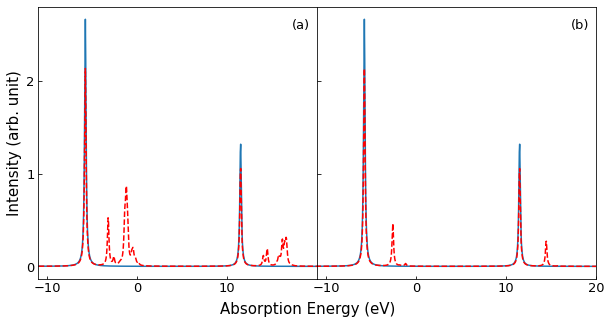

In [395]:
fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(1,2,hspace=0,wspace=0)
axs = gs.subplots(sharex=False,sharey=True)
d = 0
axs[0].plot(x,d9a*(1-d)+d8HSa*d,linewidth=lw)
axs[1].plot(x,d9a*(1-d)+d8LSa*d,linewidth=lw)
d = 0.2
axs[0].plot(x,d9a*(1-d)+d8HSa*d,color="red",linestyle="dashed",linewidth=lw)
axs[1].plot(x,d9a*(1-d)+d8LSa*d,color="red",linestyle="dashed",linewidth=lw)
for i in range(0,2):
    axs[i].tick_params(axis="x",direction="in")
    axs[i].tick_params(axis="y",direction="in")
axs[0].set_xlim([-11,20])
axs[1].set_xlim([-11,20])
axs[0].set_xticks(range(-10,20,10))
axs[1].set_xticks(range(-10,21,10))
axs[0].set_yticks(range(0,3,1))
fig.text(0.5,0.04, "Absorption Energy (eV)",ha="center",va="center",fontsize=15)
axs[0].set_ylabel("Intensity (arb. unit)",fontsize=15)
axs[0].annotate("(a)", xy=(0.91, 0.92), xycoords="axes fraction")
axs[1].annotate("(b)", xy=(0.91, 0.92), xycoords="axes fraction")
plt.savefig('/Users/seanhsu/Desktop/School/Research/Abstracts/E. Been 2021 Frontier/1sitedoped.eps', format='eps')